In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [11]:
class Linear(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = torch.nn.Linear(1,1)

  def forward(self,x):
    out = self.linear(x)
    return out

  
class LinearRegression():

  def __init__(self,model):
    super().__init__()
    self.model = model
    self.optimizer = torch.optim.SGD(self.model.parameters(),lr=0.1,momentum=0.9)
    self.loss_function = torch.nn.MSELoss()
    self.epoches = 1000

  def train(self,data, model_save_path="./model.pth"):
    x = data['x']
    y = data['y']
    for epoch in range(self.epoches):
      prediction = self.model.forward(x)
      loss = self.loss_function(prediction,y)
      self.optimizer.zero_grad() # optimer weight = 0
      loss.backward()
      self.optimizer.step()
      if epoch % 500 == 0:
        print("epoch: {}, loss is: {}".format(epoch, loss.item()))
    torch.save(self.model.state_dict(), "./linear.pth")

  def test(self, data,model_path="./linear.pth"):
    """
    Reload and test the model, plot the prediction
    Args:
        model_path: the model's path and name
        data: (x, y) = data, and y = kx + b
    Returns:
        None
    """
    x = data["x"]
    y = data["y"]
    self.model.load_state_dict(torch.load(model_path))
    prediction = self.model.forward(x)
    
    plt.scatter(x.numpy(), y.numpy(), c=x.numpy())
    plt.plot(x.numpy(), prediction.detach().numpy(), color="r")
    plt.show()

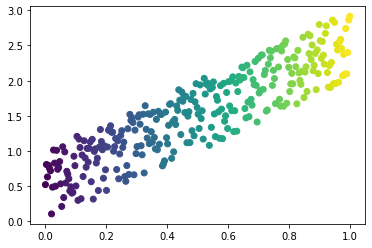

torch.Size([300, 1])


In [12]:

def create_linear_data(nums_data, if_plot= False):
    """
    Create data for linear model
    Args:
        nums_data: how many data points that wanted
    Returns:
        x with shape (nums_data, 1)
    """
    x = torch.linspace(0,1,nums_data)
    x = torch.unsqueeze(x,dim=1)
    k = 2
    y = k * x + torch.rand(x.size())
    
    if if_plot:
        plt.scatter(x.numpy(),y.numpy(),c=x.numpy())
        plt.show()
    data = {"x":x, "y":y}
    return data

data = create_linear_data(300, if_plot=True)
print(data["x"].size())

In [13]:
linear = LinearRegression(Linear())
linear.train(data)

epoch: 0, loss is: 2.5974597930908203
epoch: 500, loss is: 0.08333219587802887


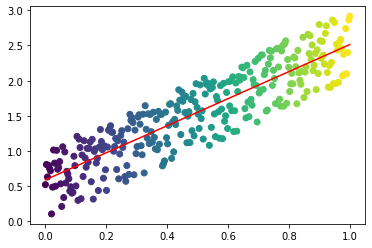

In [14]:
linear.test(data)